# Hotel nights in Bern, Switzerland

Switzerland's national department of statistics publishes some [data about tourism](https://www.pxweb.bfs.admin.ch/default.aspx?px_language=de). I would like to look at the information about the overnight stays in in and around of the city of Bern. 

I first downloaded [a first dataset](https://www.pxweb.bfs.admin.ch/DownloadFile.aspx?file=px-x-1003020000_103). It was too complicated to work with, though, since there are too many dimensions. Therefor I went back and got a simpler version not containing detail information about the exact region and just listening the the nights (without the arrivals). Later I had to go back again: I couldn't sum the values easily since the values were not in a row but in a line. And I first had to exclude the rows with the year and the month. I finally got the final version of the raw data. 

I was first working on it in the spreadsheet program since I had to do some changes to the year/ month column. 

Since the file was encoded in ISO-8859 I had to convert it to UTF8 using the following linux command: iconv -f ISO-8859-1 tourism_bern.csv -t UTF8 -o tourism_bern_UTF8.csv. I then did some manual cleaning of the data in the spreadsheet program before loading it into Pandas. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Open your dataset up using pandas in a Jupyter notebook

In [3]:
df = pd.read_csv("tourism_bern_UTF8.csv", sep=";", header=0)

## Do a .head() to get a feel for your data

In [4]:
df.head()

,Herkunftsland,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04
0,Schweiz,31656.0,29053.0,34611.0,38476.0,40227.0,43511.0,37236.0,45161.0,47092.0,...,41334.0,47883.0,48506.0,47865.0,45621.0,36398.0,32109.0,35313.0,39971.0,41498.0
1,Baltische Staaten,68.0,34.0,42.0,82.0,72.0,118.0,48.0,113.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Deutschland,8884.0,9102.0,10493.0,11352.0,12262.0,13971.0,14522.0,17403.0,14759.0,...,10641.0,12812.0,12333.0,12083.0,11426.0,8115.0,8043.0,9505.0,10878.0,9919.0
3,Frankreich,2001.0,1903.0,2034.0,2327.0,2026.0,2478.0,2503.0,3029.0,2179.0,...,2549.0,2399.0,1597.0,2136.0,1746.0,1892.0,1509.0,2049.0,1903.0,1863.0
4,Italien,1389.0,1146.0,1361.0,1779.0,1496.0,1857.0,1880.0,3220.0,2146.0,...,2306.0,3352.0,1632.0,1869.0,2320.0,3439.0,2418.0,1851.0,2126.0,2000.0


## Write down 12 questions to ask your data, or 12 things to hunt for in the data.

#### 12 Questions
- How many nights did all tourists together book in hotels in the canton of Bern in the last month?
- How does the last month compare to the corresponding month of the previous year -- and to the corresponding month of the previous 10 years?
- In what month of what year took the maximum of tourists an overnight stop in Bern? 
- What was the worst month in the recent history of Bern's hotels?
- From what five countries are coming the least persons?
- The Swiss spent the most nights in Bern's hotels. People from what other five other countries the are most important for the hotels?
- How many nights per year did guests from the US spend in Bern's hotels? 
- A change in Switzerland's money policies did lead to a strong revaluation of the Swiss Franc in January 2015. Did less tourists sleep in Hotels after this date? 
- The parlament meets normally four times a year: in March, June, September and November. Are the hotels in this time more busy?
- Bern war one of the host cities during the soccer europe cup 2008. Did the hotels have in June 2008 more guest than usually in this month?




- Make a histogram comparing the number of booked nights for the last five years.
- The Swiss spent the most nights in Bern's hotels. What country is the next to follow?
- A change in Switzerland's money policies did lead to a massive revaluation of the Swiss Franc in January 2015. Did less foreign tourists sleep in Hotels after? 
- Did the percentage of people from Switzerland increase after January 2015?
- What nations are avoiding Switzerland since January 2015 the most?
- In what month are the most and the least tourists around? 
- The parlament meets normally in XY, XY and XY. Are the hotels in this time more busy?
- Bern war one of the host cities during the soccer europe cup 2008. Did the hotels more guest than usually in this time?
- How many nights are selling the hotels in Bern per day in average? How many are they selling in high season in summer and winter?
- For what nation does the statistic show the biggest increase or decrease between 2010 and 2015?
- What's the percentage of the tourists coming from countries where German is not a official language? 

#### 3 graphics


### How many nights did all tourists together book in hotels in and around Bern in the last month?

Actually, the last month is not available yet. Let's stick to April then. But first, we'll have to do some more housekeeping: We need to get rid of the three points in all cells without data. I tried it with df.replace("...","") but didn't suceed. Therefore I went back to the spreadsheet and did a quick replaced of the caracters there. I also merged the two date fields of every column into one. 

In [5]:
april_2016 = df[['Herkunftsland', '2016-04']]
print("In April 2016, Bern's hotels did sell", int(april_2016['2016-04'].sum()), "overnight stays.")

In April 2016, Bern's hotels did sell 77111 overnight stays.


### How does the last month compare to the corresponding month of the previous year -- and to the corresponding month of the previous 10 years?

In [6]:
print("In April 1015, Bern's hotels did sell", int(df['2015-04'].sum()), "overnight stays.")
if df['2016-04'].sum() > df['2015-04'].sum(): 
    print("The year 2016 was a better year for the Hotels than 2015. They did sell", df['2016-04'].sum() - df['2015-04'].sum(), "more nights.")
else:
    print("The year 2015 was better than 2016. The hotels sold", int(df['2015-04'].sum() - df['2016-04'].sum()), "more nights.")

In April 1015, Bern's hotels did sell 77316 overnight stays.
The year 2015 was better than 2016. The hotels sold 205 more nights.


In [7]:
import re
columns = df.columns.values[1:]
aprils = [column for column in columns if re.search(r'\d{4}-\d4', column)]
print(df[aprils].sum())
print("\n" + str(df[aprils].sum().describe()))

2005-04    72034.0
2006-04    72446.0
2007-04    74710.0
2008-04    81299.0
2009-04    78156.0
2010-04    75449.0
2011-04    75099.0
2012-04    76908.0
2013-04    84002.0
2014-04    78514.0
2015-04    77316.0
2016-04    77111.0
dtype: float64

count       12.000000
mean     76920.333333
std       3409.158663
min      72034.000000
25%      75001.750000
50%      77009.500000
75%      78245.500000
max      84002.000000
dtype: float64


### In what month of what year took the maximum of tourists an overnight stop in Bern? 

In [8]:
month_list = df.columns[1:]
best_month = month_list[0]

for month in month_list:
    if df[month].sum() > df[best_month].sum():
        best_month = month
print("The best month in the recent history of Berne's hotels was", best_month, "with", int(df[best_month].sum()), "booked nights.")

The best month in the recent history of Berne's hotels was 2014-08 with 119267 booked nights.


### What was the worst month in the recent history of Bern's hotels?

In [8]:
month_list = df.columns[1:]
worst_month = month_list[0]

for month in month_list:
    if df[month].sum() < df[worst_month].sum():
        worst_month = month
print("The worst month in the recent history of Berne's hotels was", worst_month, "with", int(df[worst_month].sum()), "booked nights.")

The worst month in the recent history of Berne's hotels was 2005-02 with 53205 booked nights.


### From what five countries are coming the least persons?
I am filling in a new column named "total" that contains the sums of the previous columns. 

In [9]:
total = 0
df['Total'] = total # Resetting in order to be able to rerun the code without getting wrong values.
df['Total'] = df.sum(axis=1)
df.head(2)

df[['Herkunftsland', 'Total']].sort_values(by='Total', ascending=True).head(5)


,Herkunftsland,Total
41,Bahrain,766.0
26,Malta,977.0
27,Zypern,1314.0
59,Oman,1325.0
65,Litauen,2031.0


### The Swiss spent the most nights in Bern's hotels. People from what other five other countries the are most important for the hotels?

In [55]:
df[['Herkunftsland', 'Total']].where(df['Herkunftsland'] != 'Schweiz').sort_values(by='Total', ascending=False).head(5)

,Herkunftsland,Total
2,Deutschland,1771343.0
29,Vereinigte Staaten von Amerika,426445.0
3,Frankreich,297146.0
4,Italien,296995.0
6,Vereinigtes Königreich,286842.0


### How many nights per year did guests from the US spend in Bern's hotels? 

In [55]:
us_tourists = df[df['Herkunftsland'] == 'Vereinigte Staaten von Amerika']
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
months = ['01','02', '03', '04', '05','06', '07', '08', '09', '10','11', '12']
us = {}
for year in years:
    total = 0
    for month in months:
        total = total + int(us_tourists[str(year)+'-'+month])
    us[str(year)] = total
df_us = (pd.DataFrame(us, index=['nights'])).T
df_us

,nights
2005,39009
2006,40596
2007,40863
2008,39206
2009,35370
2010,36435
2011,32023
2012,34456
2013,35811
2014,38259


### A change in Switzerland's money policies did lead to a strong revaluation of the Swiss Franc in January 2015. Did less tourists sleep in Hotels after this date? 

In [57]:
change_year = 2015
month_before = []
month_after = []

for month in month_list: 
    tempmonth = int("".join(re.findall(r'(\d{4})-\d{2}', month)))
    if tempmonth < change_year:
        month_before.append(month)
    elif tempmonth >= change_year:
        month_after.append(month)

sum_before = 0
sum_after = 0

for month in month_before:
    sum_before = sum_before + df[month].sum()

for month in month_after:     
    sum_after = sum_after + df[month].sum()

average_before = sum_before / len(month_before)
average_after = sum_after / len(month_after)

print("Average of the months before the revaluation of the Swiss Franc in 2015:", round(average_before), "nights.")
print("Average of the months after the revaluation of the Swiss Franc in 2015:", round(average_after), "nights.")
print("After the revaluation, the average of nights per month is", round(average_before - average_after), "less. That's a minus of", 100 - (100 * average_after / average_before), "percent.")

print("\nBefore the Swiss Franc climbed to new heights:\n")
print(df[month_before].sum())

print("\nAfter the Swiss Franc climbed to new heights:\n")
print(df[month_after].sum())

Average of the months before the revaluation of the Swiss Franc in 2015: 83012.0 nights.
Average of the months after the revaluation of the Swiss Franc in 2015: 82324.0 nights.
After the revaluation, the average of nights per month is 688.0 less. That's a minus of 0.828312980879 percent.

Before the Swiss Franc climbed to new heights:

2005-01     59720.0
2005-02     53205.0
2005-03     63670.0
2005-04     72034.0
2005-05     77095.0
2005-06     86944.0
2005-07     84420.0
2005-08    101128.0
2005-09     90311.0
2005-10     87006.0
2005-11     76516.0
2005-12     57607.0
2006-01     55401.0
2006-02     56961.0
2006-03     74208.0
2006-04     72446.0
2006-05     88208.0
2006-06     91488.0
2006-07     91110.0
2006-08     99946.0
2006-09     95179.0
2006-10     89475.0
2006-11     76118.0
2006-12     64950.0
2007-01     59618.0
2007-02     59540.0
2007-03     70691.0
2007-04     74710.0
2007-05     84640.0
2007-06     95403.0
             ...   
2012-07     95399.0
2012-08    107061.0
20

### The parlament meets normally four times a year: in March, June, September and November. Are the hotels in this time more busy?
In order to find out, we are comparing the month with session to the previous month (without session). 

In [174]:
years = range(2005,2016)
sessions = { 'Spring' : '03', 'Summer' : '06', 'Fall' : '09', 'Winter' : '11'}
previous_sessions = ['02', '05', '08', '10']


for year in years:
    print("-----")
    print("Spring", str(year) + ":", int(df[str(year) + '-03'].sum()), "/ Previous month:", int(df[str(year) + '-02'].sum()), "/ Difference:", int(df[str(year) + '-03'].sum()) - int(df[str(year) + '-02'].sum()))
    print("Summer", str(year) + ":", int(df[str(year) + '-06'].sum()), "/ Previous month:", int(df[str(year) + '-05'].sum()), "/ Difference:", int(df[str(year) + '-06'].sum()) - int(df[str(year) + '-05'].sum()))
    print("Fall", str(year) + ":", int(df[str(year) + '-09'].sum()), "/ Previous month:", int(df[str(year) + '-08'].sum()), "/ Difference:", int(df[str(year) + '-09'].sum()) - int(df[str(year) + '-08'].sum()))
    print("Winter", str(year) + ":", int(df[str(year) + '-11'].sum()), "/ Previous month:", int(df[str(year) + '-10'].sum()), "/ Difference:", int(df[str(year) + '-11'].sum()) - int(df[str(year) + '-10'].sum()))

-----
Spring 2005: 63670 / Previous month: 53205 / Difference: 10465
Summer 2005: 86944 / Previous month: 77095 / Difference: 9849
Fall 2005: 90311 / Previous month: 101128 / Difference: -10817
Winter 2005: 76516 / Previous month: 87006 / Difference: -10490
-----
Spring 2006: 74208 / Previous month: 56961 / Difference: 17247
Summer 2006: 91488 / Previous month: 88208 / Difference: 3280
Fall 2006: 95179 / Previous month: 99946 / Difference: -4767
Winter 2006: 76118 / Previous month: 89475 / Difference: -13357
-----
Spring 2007: 70691 / Previous month: 59540 / Difference: 11151
Summer 2007: 95403 / Previous month: 84640 / Difference: 10763
Fall 2007: 95651 / Previous month: 107040 / Difference: -11389
Winter 2007: 80985 / Previous month: 90195 / Difference: -9210
-----
Spring 2008: 73271 / Previous month: 65139 / Difference: 8132
Summer 2008: 88997 / Previous month: 93288 / Difference: -4291
Fall 2008: 96425 / Previous month: 107683 / Difference: -11258
Winter 2008: 79830 / Previous mont

### Bern war one of the host cities during the soccer europe cup 2008. Did the hotels have in June 2008 more guest than usually in this month?

In [181]:
for year in years: 
    print("June", year, int(df[str(year) + '-06'].sum()))

June 2005 86944
June 2006 91488
June 2007 95403
June 2008 88997
June 2009 91276
June 2010 96180
June 2011 97779
June 2012 98185
June 2013 105194
June 2014 96880
June 2015 98048


No, the hotels didn't benefit at all. One reason might be: The dutch were mainly plaing in Bern. And the dutch fans love to camp out.

### In what months normally are the most and the least tourists around? 

In [100]:
import numpy

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December']

for month in month_list:
    month = []
    
for year in years:
    for month in month_list:
        print(df[str(year) + '-01'].sum())
    print(month)
'''
for year in years:
    january.append(df[str(year) + '-01'].sum())
    february.append(df[str(year) + '-02'].sum())
    march.append(df[str(year) + '-03'].sum())
    april.append(df[str(year) + '-04'].sum())
    may.append(df[str(year) + '-05'].sum())
    june.append(df[str(year) + '-06'].sum())
    july.append(df[str(year) + '-07'].sum())
    august.append(df[str(year) + '-08'].sum())
    september.append(df[str(year) + '-09'].sum())
    october.append(df[str(year) + '-10'].sum())
    november.append(df[str(year) + '-11'].sum())
    december.append(df[str(year) + '-12'].sum())
    

month_dict = { "January" : january , "February" : february, "March" : march, "April" : april, "May" : may, "June" : june , "July" : july, "August" : august, "September" : september, "October" : october, "November" : november, "December" : december }
month_average = {}

for month in month_list: 
    print(month + ":", int(numpy.mean(month_dict[month])))
    month_average[month] = numpy.mean(month_dict[month])'''

59720.0
59720.0
59720.0
59720.0
59720.0
59720.0
59720.0
59720.0
59720.0
59720.0
59720.0
December
55401.0
55401.0
55401.0
55401.0
55401.0
55401.0
55401.0
55401.0
55401.0
55401.0
55401.0
December
59618.0
59618.0
59618.0
59618.0
59618.0
59618.0
59618.0
59618.0
59618.0
59618.0
59618.0
December
63806.0
63806.0
63806.0
63806.0
63806.0
63806.0
63806.0
63806.0
63806.0
63806.0
63806.0
December
62810.0
62810.0
62810.0
62810.0
62810.0
62810.0
62810.0
62810.0
62810.0
62810.0
62810.0
December
55585.0
55585.0
55585.0
55585.0
55585.0
55585.0
55585.0
55585.0
55585.0
55585.0
55585.0
December
67377.0
67377.0
67377.0
67377.0
67377.0
67377.0
67377.0
67377.0
67377.0
67377.0
67377.0
December
58202.0
58202.0
58202.0
58202.0
58202.0
58202.0
58202.0
58202.0
58202.0
58202.0
58202.0
December
62316.0
62316.0
62316.0
62316.0
62316.0
62316.0
62316.0
62316.0
62316.0
62316.0
62316.0
December
64471.0
64471.0
64471.0
64471.0
64471.0
64471.0
64471.0
64471.0
64471.0
64471.0
64471.0
December
67154.0
67154.0
67154.0
67154.

'\nfor year in years:\n    january.append(df[str(year) + \'-01\'].sum())\n    february.append(df[str(year) + \'-02\'].sum())\n    march.append(df[str(year) + \'-03\'].sum())\n    april.append(df[str(year) + \'-04\'].sum())\n    may.append(df[str(year) + \'-05\'].sum())\n    june.append(df[str(year) + \'-06\'].sum())\n    july.append(df[str(year) + \'-07\'].sum())\n    august.append(df[str(year) + \'-08\'].sum())\n    september.append(df[str(year) + \'-09\'].sum())\n    october.append(df[str(year) + \'-10\'].sum())\n    november.append(df[str(year) + \'-11\'].sum())\n    december.append(df[str(year) + \'-12\'].sum())\n    \n\nmonth_dict = { "January" : january , "February" : february, "March" : march, "April" : april, "May" : may, "June" : june , "July" : july, "August" : august, "September" : september, "October" : october, "November" : november, "December" : december }\nmonth_average = {}\n\nfor month in month_list: \n    print(month + ":", int(numpy.mean(month_dict[month])))\n    mon

### How many nights are selling the hotels in Bern per day in average? How many are they selling in high season in summer and winter?

### How many percent of all nights are booked by Swiss people? 

In [119]:
countries = ['Schweiz', 'Deutschland', 'Vereinigte Staaten von Amerika', 'Frankreich', 'Italien', 'Vereinigtes Königreich']

swiss_tourists = df[df['Herkunftsland'] == 'Schweiz']
df_swiss = pd.DataFrame(swiss_tourists).T
swiss_dict = df_swiss.to_dict()
swiss_dict[0]

#total_ch = df['Total'].where[df['Herkunftsland'] == 'Schweiz']
#total_ch
# df.where(df['Herkunftsland'] == 'Schweiz').T.sum('Total')

{'2005-01': 31656.0,
 '2005-02': 29053.0,
 '2005-03': 34611.0,
 '2005-04': 38476.0,
 '2005-05': 40227.0,
 '2005-06': 43511.0,
 '2005-07': 37236.0,
 '2005-08': 45161.0,
 '2005-09': 47092.0,
 '2005-10': 43124.0,
 '2005-11': 41529.0,
 '2005-12': 30566.0,
 '2006-01': 27917.0,
 '2006-02': 28694.0,
 '2006-03': 36931.0,
 '2006-04': 35003.0,
 '2006-05': 43089.0,
 '2006-06': 45884.0,
 '2006-07': 38685.0,
 '2006-08': 43563.0,
 '2006-09': 44706.0,
 '2006-10': 42911.0,
 '2006-11': 41236.0,
 '2006-12': 33551.0,
 '2007-01': 31115.0,
 '2007-02': 29124.0,
 '2007-03': 34875.0,
 '2007-04': 34418.0,
 '2007-05': 39821.0,
 '2007-06': 46765.0,
 '2007-07': 37600.0,
 '2007-08': 43300.0,
 '2007-09': 45262.0,
 '2007-10': 43584.0,
 '2007-11': 42654.0,
 '2007-12': 32751.0,
 '2008-01': 30212.0,
 '2008-02': 32639.0,
 '2008-03': 34856.0,
 '2008-04': 40506.0,
 '2008-05': 45991.0,
 '2008-06': 38755.0,
 '2008-07': 39323.0,
 '2008-08': 44687.0,
 '2008-09': 44875.0,
 '2008-10': 47218.0,
 '2008-11': 43973.0,
 '2008-12': 3

## Make three charts with your dataset

## From what foreign countries are coming most of the tourists?

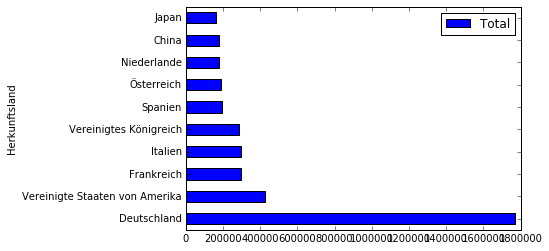

In [22]:
by_nation = df[['Herkunftsland', 'Total']].where(df['Herkunftsland'] != 'Schweiz').sort_values(by='Total', ascending=False).head(10)
by_nation.plot(kind='barh', x='Herkunftsland', y='Total')

## How many US tourists slept in Bern's hotels? 

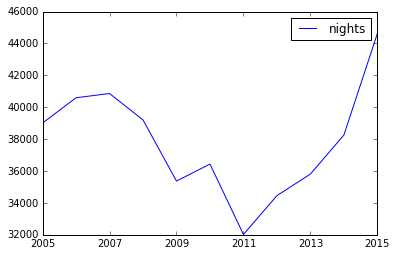

In [54]:
df_us.plot()

### Make a histogram comparing the number of booked nights.

In [11]:
columns = df.columns.values[1:]
for i in columns:
    if re.search(r'\d{4}-\d4', column)]
print(df[aprils].sum())
print("\n" + str(df[aprils].sum().describe()))

SyntaxError: invalid syntax (<ipython-input-11-97ec4d4789b7>, line 3)

### Make a horizontal bar chart comparing all the origin of Berne's guests.

In [15]:
df.plot(kind='barh', x='Herkunftsland', y=summen)

KeyError: "[ 'SchweizBaltische StaatenDeutschlandFrankreichItalienÖsterreichVereinigtes KönigreichIrlandNiederlandeBelgienLuxemburgDänemarkSchwedenNorwegenFinnlandSpanienPortugalGriechenlandTürkeiÜbriges EuropaLiechtensteinIslandPolenUngarnWeissrusslandBulgarienMaltaZypernChileVereinigte Staaten von AmerikaKanadaMexikoBrasilienArgentinienZentralamerika, KaribikÜbriges SüdamerikaÜbriges Zentralamerika, KaribikAegyptenÜbriges NordafrikaSüdafrika, RepublikÜbriges AfrikaBahrainIsraelIndienJapanÜbriges Süd- und OstasienKatarKuwaitAustralienAustralien, Neuseeland, OzeanienChinaGolf-StaatenHongkongIndonesienKorea, RepublikMalaysiaPhilippinenNeuseeland, OzeanienSingapurOmanTaiwanThailandÜbriges WestasienEstlandLettlandLitauenSaudi ArabienVereinigte Arabische EmirateSerbien und MontenegroKroatienRumänienRusslandSlovakeiSlowenienTschechische RepublikUkraineSerbien'\n 59720.0 53205.0 63670.0 72034.0 77095.0 86944.0 84420.0 101128.0 90311.0\n 87006.0 76516.0 57607.0 55401.0 56961.0 74208.0 72446.0 88208.0 91488.0\n 91110.0 99946.0 95179.0 89475.0 76118.0 64950.0 59618.0 59540.0 70691.0\n 74710.0 84640.0 95403.0 98345.0 107040.0 95651.0 90195.0 80985.0 66014.0\n 63806.0 65139.0 73271.0 81299.0 93288.0 88997.0 95011.0 107683.0 96425.0\n 90482.0 79830.0 64195.0 62810.0 57246.0 76766.0 78156.0 98156.0 91276.0\n 93385.0 108122.0 92914.0 86270.0 78401.0 66688.0 55585.0 59520.0 72320.0\n 75449.0 87220.0 96180.0 96388.0 110195.0 99120.0 89218.0 82780.0 66801.0\n 67377.0 62221.0 77273.0 75099.0 93923.0 97779.0 105535.0 106695.0 101924.0\n 93984.0 76389.0 63298.0 58202.0 68500.0 76463.0 76908.0 92933.0 98185.0\n 95399.0 107061.0 98001.0 89865.0 83638.0 67032.0 62316.0 62586.0 74997.0\n 84002.0 94178.0 105194.0 102653.0 116002.0 99344.0 95810.0 86462.0 64104.0\n 64471.0 58561.0 81199.0 78514.0 99813.0 96880.0 99582.0 119267.0 101967.0\n 98169.0 82616.0 70711.0 67154.0 63581.0 80243.0 77316.0 88058.0 98048.0\n 105755.0 113594.0 99362.0 93348.0 82163.0 67974.0 59857.0 68512.0 75116.0\n 77111.0 11278644.0] not in index"

### Make a timeline for all nations showing how many nights their folks spent in Bern.

In [ ]:
all_sums = df.sum()

In [39]:

df.plot(kind='bar', x=month_list y=df.sum())

SyntaxError: invalid syntax (<ipython-input-39-5999d45d9766>, line 1)